# 라이브러리 설치

## 필요 라이브러리 가져오기



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 분석에 필요한 라이브러리
import pandas as pd
import numpy as np

# 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# 결측치 파악에 필요한 라이브러리
import missingno as msno

# 경고문 제외에 필요한 라이브러리
import warnings
warnings.filterwarnings('ignore')

# 문장 전처리에 필요한 라이브러리
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 데이터 수집

## 데이터 가져오기

In [3]:
df_trump = pd.read_csv('/content/drive/MyDrive/data/trumptweets.csv')
df_trump.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [4]:
# 데이터 행/열 수 확인
df_trump.shape

(41122, 9)

In [5]:
# 데이터 변수 별 정보 확인
df_trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         41122 non-null  int64  
 1   link       41122 non-null  object 
 2   content    41122 non-null  object 
 3   date       41122 non-null  object 
 4   retweets   41122 non-null  int64  
 5   favorites  41122 non-null  int64  
 6   mentions   22467 non-null  object 
 7   hashtags   5810 non-null   object 
 8   geo        0 non-null      float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ MB


* 총 41122개의 데이터로 구성되어 있고 9개의 컬럼으로 이루어져 있다.
* mentions, hashtags, geo 변수에 결측값이 있는 것으로 보여진다.
* 변수 설명
    * id : 임의의 id
    * link : 트위터 링크
    * content : 트위터 게시글
    * date : 트위터 게시 날짜
    * retweets : 리트윗 횟수(리트윗 : 다른 사람의 트윗이나 내 트윗을 다시 올리는 것)
    * favorites : 트위터 게시글 좋아요 수
    * mentions :
    * hashtags :
    * geo :

# 데이터 전처리

## 결측치 확인하기

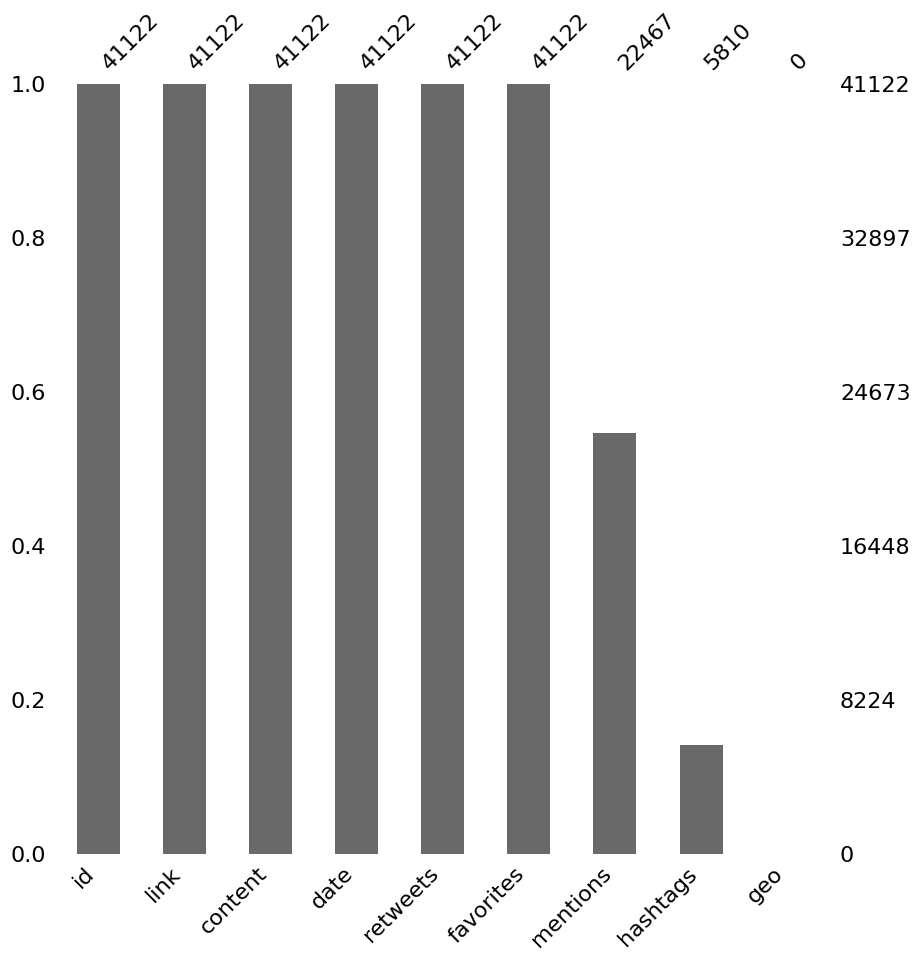

In [6]:
# 결측치 관련 시각화
msno.bar(df_trump, figsize=(10,10))
plt.show()

* mentions, hashtags, geo 변수는 결측치가 많기 때문에 우선 제거해준다.

## 필요 변수 추출

In [7]:
# 기존 데이터에서 필요한 변수만 포함한 데이터 만들기
df_trump_new = df_trump.loc[:,'content':'favorites']
df_trump_new

,content,date,retweets,favorites
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965
...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921


## date 변수 분리

In [8]:
# date 변수 분리

df_trump_new['year'] = df_trump_new['date'].str.split('-').str[0] # 연도
df_trump_new['month'] = df_trump_new['date'].str.split('-').str[1] # 월
df_trump_new['hour'] = df_trump_new['date'].str.split(' ').str[1].str.split(':').str[0] # 시간

df_trump_new

,content,date,retweets,favorites,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,2009,05,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,2009,05,03
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,2009,05,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,2009,05,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,2009,05,16
...,...,...,...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,2020,01,19
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,2020,01,22
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,2020,01,01
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,2020,01,02


# 데이터 시각화

## date 관련 변수 시각화

### 연도, 월, 시간 별 게시물 수 보기

In [14]:
# 연도
df_trump_new['year'].value_counts().sort_index()

2009      56
2010     143
2011     870
2012    4190
2013    8207
2014    5987
2015    7719
2016    3951
2017    2232
2018    2998
2019    4588
2020     181
Name: year, dtype: int64

In [15]:
# 월
df_trump_new['month'].value_counts().sort_index()

01    3864
02    2978
03    2898
04    3438
05    3317
06    3149
07    3676
08    3148
09    3410
10    4508
11    3339
12    3397
Name: month, dtype: int64

In [16]:
# 시간
df_trump_new['hour'].value_counts().sort_index()

00    1620
01    1522
02    1795
03    1974
04    2076
05    1258
06     831
07     400
08     347
09     321
10     458
11     706
12    1377
13    2226
14    2448
15    2544
16    2319
17    2146
18    2025
19    2095
20    2696
21    3184
22    3050
23    1704
Name: hour, dtype: int64

### 시각화

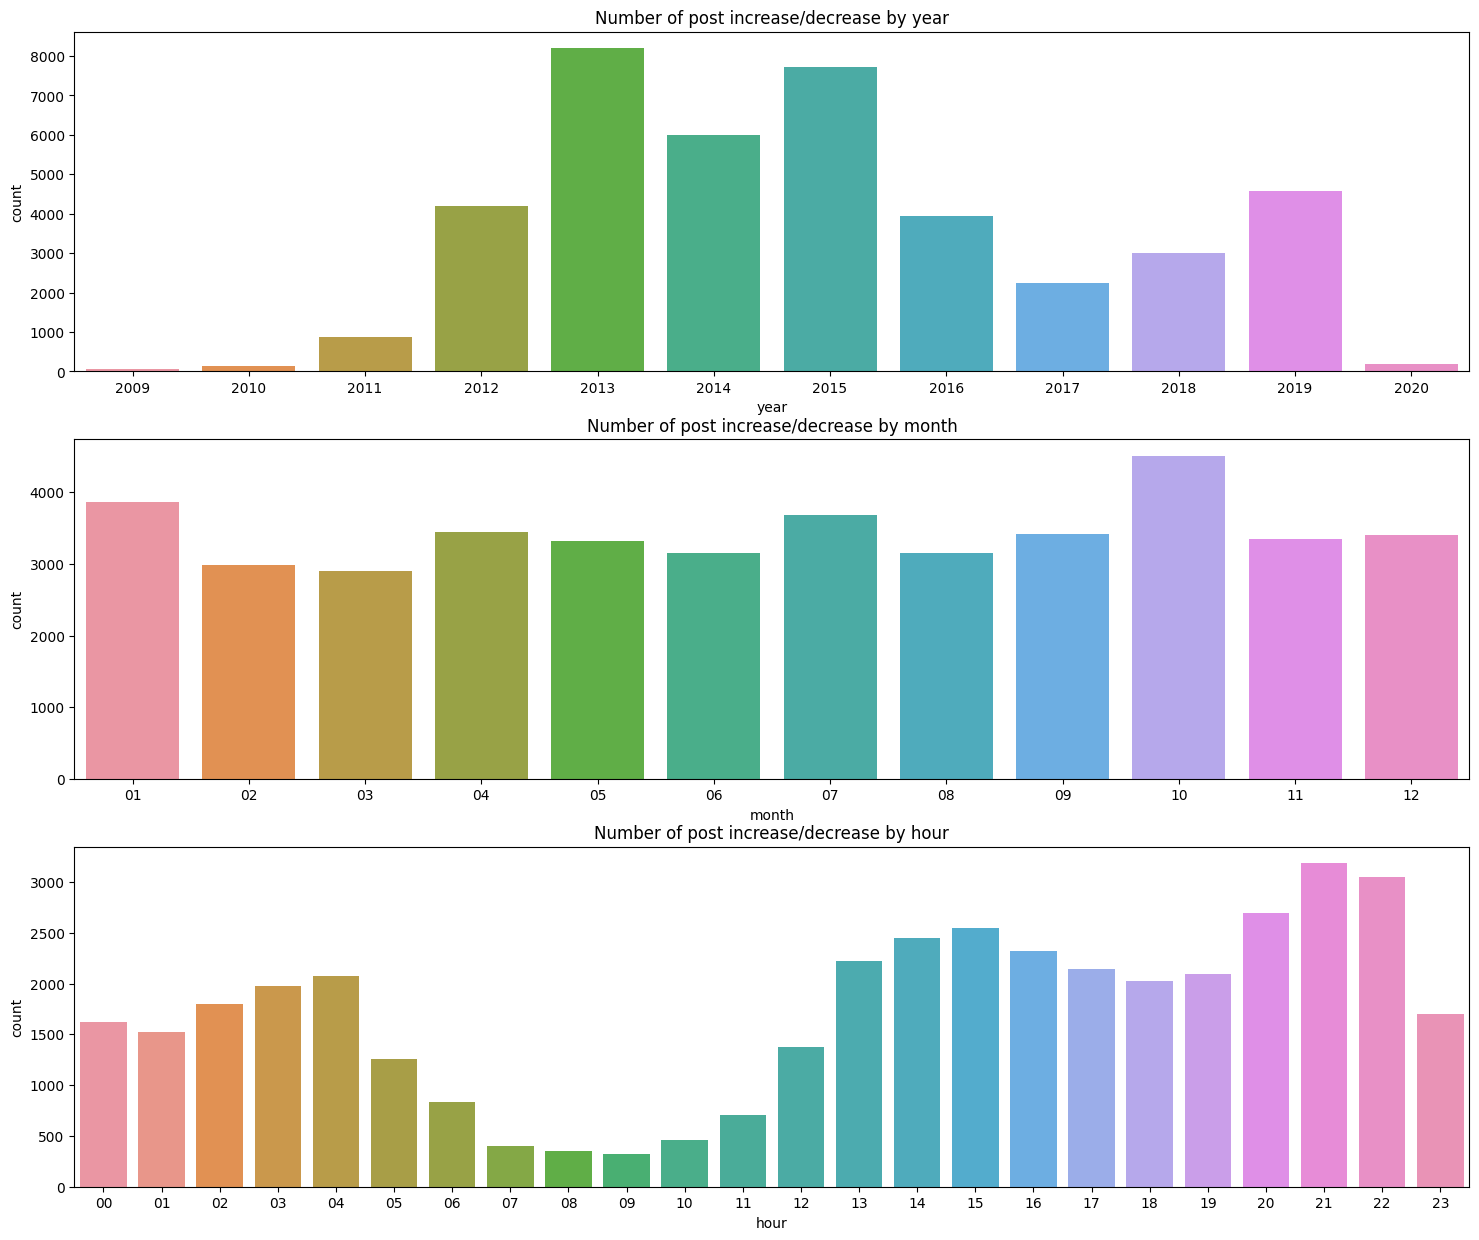

In [17]:
f, ax = plt.subplots(3, 1, figsize = (18,15))

sns.countplot(x = 'year', data = df_trump_new, ax = ax[0])
ax[0].set_title('Number of post increase/decrease by year')
sns.countplot(x = 'month', data = df_trump_new, ax = ax[1], order = df_trump_new['month'].value_counts().sort_index().index)
ax[1].set_title('Number of post increase/decrease by month')
sns.countplot(x = 'hour', data = df_trump_new, ax = ax [2], order = df_trump_new['hour'].value_counts().sort_index().index)
ax[2].set_title('Number of post increase/decrease by hour')

plt.show()

### 참고

In [18]:
# 2009년 데이터 확인
df_2009 = df_trump_new[df_trump_new['year'] == '2009']
df_2009['month'].value_counts()

05    21
06    11
08     7
07     5
10     4
09     3
11     3
12     2
Name: month, dtype: int64

* 2009년에 1~4월 데이터가 없다.

In [19]:
# 2020년 데이터 확인
df_2020 = df_trump_new[df_trump_new['year'] == '2020']
df_2020['month'].value_counts()

01    181
Name: month, dtype: int64

* 2020년에는 1월 데이터 밖에 없다.

## 재임 전 데이터 시각화

### 필요 데이터 추출 및 좋아요 수 확인

In [20]:
# 2013 ~ 2016년 데이터 추출
df_1316 = df_trump_new[(df_trump_new['year'] >= '2013') & (df_trump_new['year'] <= '2016')]
df_1316

,content,date,retweets,favorites,year,month,hour
5259,Republicans are making a mistake if they don't...,2013-01-01 00:46:57,160,49,2013,01,00
5260,Republicans have all the cards...but they just...,2013-01-01 00:48:04,177,81,2013,01,00
5261,Happy New Year everyone...it will be an intere...,2013-01-01 00:49:20,522,402,2013,01,00
5262,Obama and the Democrats are laughing at the de...,2013-01-01 16:10:46,467,100,2013,01,16
5263,I am a Republican...but the Republicans may be...,2013-01-01 16:13:14,831,498,2013,01,16
...,...,...,...,...,...,...,...
31118,Great move on delay (by V. Putin) - I always k...,2016-12-30 20:41:33,29104,83039,2016,12,20
31119,"Join @ AmerIcan32, founded by Hall of Fame leg...",2016-12-30 20:46:55,6201,21635,2016,12,20
31120,Russians are playing @ CNN and @ NBCNews for s...,2016-12-30 23:18:18,19319,72360,2016,12,23
31121,"Happy New Year to all, including to my many en...",2016-12-31 14:17:21,121041,314786,2016,12,14


In [21]:
# 좋아요 중앙값 구하기
df_1316['favorites'].median()

76.0

In [22]:
# 좋아요 수 76이상인 게시물 데이터
df_1316_good = df_1316[df_1316['favorites'] >= 76]
df_1316_good

,content,date,retweets,favorites,year,month,hour
5260,Republicans have all the cards...but they just...,2013-01-01 00:48:04,177,81,2013,01,00
5261,Happy New Year everyone...it will be an intere...,2013-01-01 00:49:20,522,402,2013,01,00
5262,Obama and the Democrats are laughing at the de...,2013-01-01 16:10:46,467,100,2013,01,16
5263,I am a Republican...but the Republicans may be...,2013-01-01 16:13:14,831,498,2013,01,16
5266,This is a terrible deal for the country and an...,2013-01-02 15:56:09,437,167,2013,01,15
...,...,...,...,...,...,...,...
31118,Great move on delay (by V. Putin) - I always k...,2016-12-30 20:41:33,29104,83039,2016,12,20
31119,"Join @ AmerIcan32, founded by Hall of Fame leg...",2016-12-30 20:46:55,6201,21635,2016,12,20
31120,Russians are playing @ CNN and @ NBCNews for s...,2016-12-30 23:18:18,19319,72360,2016,12,23
31121,"Happy New Year to all, including to my many en...",2016-12-31 14:17:21,121041,314786,2016,12,14


In [23]:
# 좋아요 수 76 미만인 게시물 데이터
df_1316_bad = df_1316[df_1316['favorites'] < 76]
df_1316_bad

,content,date,retweets,favorites,year,month,hour
5259,Republicans are making a mistake if they don't...,2013-01-01 00:46:57,160,49,2013,01,00
5264,What is Mitch McConnell thinking?...make the b...,2013-01-01 16:16:41,86,32,2013,01,16
5265,Maybe Boehner will stop this one sided deal in...,2013-01-01 16:20:23,187,66,2013,01,16
5268,My @ foxandfriends interview from Monday discu...,2013-01-02 17:55:35,30,22,2013,01,17
5269,The party of the year in Palm Beach was the Ne...,2013-01-02 18:01:34,38,25,2013,01,18
...,...,...,...,...,...,...,...
23296,""" @ Desheay: @ realDonaldTrump Your twitter ba...",2015-06-16 09:35:30,25,52,2015,06,09
23331,""" @ AndyBran: @ JoeNBC Mr. Trump nailed it! Wo...",2015-06-19 13:55:49,65,71,2015,06,13
23386,"""@JakeKonczyk: @ realDonaldTrump @ KarlRove Th...",2015-06-22 02:37:58,35,74,2015,06,02
23412,. @ deneenborelli Thank you for your nice word...,2015-06-22 15:50:01,26,72,2015,06,15


### content 변수 전처리 및 빈도 분석

In [24]:
# content 변수 전처리해주는 함수 선언

def content_preprocessing(df):
    content = ''
    for text in df['content']:
        content = content + ' ' + text

    filtered_content = content.lower() # 대소문자 통일
    word_tokens = nltk.word_tokenize(filtered_content) # 단어 단위로 잘라주기
    token_pos = nltk.pos_tag(word_tokens) # 품사 찾아주기

    # 명사 단어만 추출하기
    NN_words = []

    for word, pos in token_pos:
        if 'NN' in pos: # NN도 여러개가 있기 때문
            NN_words.append(word)

    # 명사는 단수형으로 변환
    wlem = nltk.WordNetLemmatizer()
    lemmatized_words = []

    for word in NN_words:
        new_word = wlem.lemmatize(word)
        lemmatized_words.append(new_word)

    # a, an, the, this, that 같은 불용어 제거
    stopwords_list = stopwords.words('english') # nltk에서 제공하는 영어 불용어사전

    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words

    # 불용어 제거
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words : final_NN_words.remove(word)

    # 추가로 제거하고 싶은 단어 제거
    customized_stopwords = ['@', 'http', '…', '’', '”', '%','“', '....', '–']
    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words: final_NN_words.remove(word)

    return final_NN_words

In [25]:
list_1316_good = content_preprocessing(df_1316_good) # 좋아요 수가 76개 이상인 게시물에서 나온 명사 리스트
list_1316_bad = content_preprocessing(df_1316_bad) # 좋아요 수가 76개 미만인 게시물에서 나온 명사 리스트

In [ ]:
# 빈도 top 20 - 좋아요 76개 이상

c_1316_good = Counter(list_1316_good)
c_1316_good.most_common(20)

[('realdonaldtrump', 2098),
 ('trump', 1560),
 ('thank', 890),
 ('people', 820),
 ('president', 710),
 ('time', 583),
 ('country', 515),
 ('obama', 473),
 ('poll', 471),
 ('job', 442),
 ('clinton', 330),
 ('today', 318),
 ('america', 316),
 ('year', 293),
 ('donald', 290),
 ('way', 276),
 ('vote', 272),
 ('cnn', 270),
 ('day', 264),
 ('makeamericagreatagain', 264)]

In [ ]:
# 빈도 top 20 - 좋아요 76개 미만
c_1316_bad = Counter(list_1316_bad)
c_1316_bad.most_common(20)

[('realdonaldtrump', 5831),
 ('trump', 1869),
 ('thanks', 1438),
 ('president', 1016),
 ('thank', 790),
 ('donald', 532),
 ('country', 423),
 ('time', 396),
 ('course', 364),
 ('show', 351),
 ('people', 337),
 ('celebapprentice', 328),
 ('golf', 312),
 ('man', 300),
 ('apprenticenbc', 287),
 ('apprentice', 280),
 ('job', 267),
 ('please', 259),
 ('year', 251),
 ('hotel', 231)]

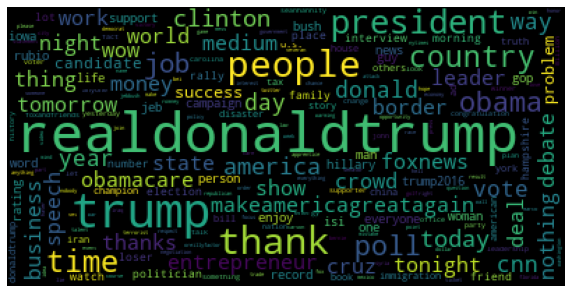

In [ ]:
# wordcloud - 좋아요 76개 이상

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate_from_frequencies(c_1316_good)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

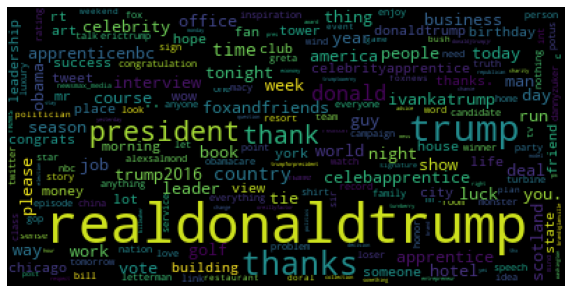

In [ ]:
# wordcloud - 좋아요 76개 미만

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate_from_frequencies(c_1316_bad)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 재임 기간 데이터 시각화

### 필요 데이터 추출 및 좋아요 수 확인

In [ ]:
# 2017년 이후 데이터 추출
df_17 = df_trump_new[df_trump_new['year'] >= '2017']
df_17

,content,date,retweets,favorites,year,month,hour
31123,TO ALL AMERICANS- # HappyNewYear & many blessi...,2017-01-01 06:00:10,28278,113734,2017,01,06
31124,"Well, the New Year begins. We will, together, ...",2017-01-02 15:40:10,25093,110594,2017,01,15
31125,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 18:31:17,14785,55607,2017,01,18
31126,"@ CNN just released a book called ""Unprecedent...",2017-01-02 19:32:29,3359,12002,2017,01,19
31127,Various media outlets and pundits say that I t...,2017-01-02 19:37:10,7707,41498,2017,01,19
...,...,...,...,...,...,...,...
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,2020,01,19
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,2020,01,22
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,2020,01,01
41120,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,2020,01,02


In [ ]:
# 좋아요 중앙값 구하기
df_17['favorites'].median()

74963.0

In [ ]:
# 좋아요 수 74963이상인 게시물 데이터
df_17_good = df_17[df_17['favorites'] >= 74963]
df_17_good

,content,date,retweets,favorites,year,month,hour
31123,TO ALL AMERICANS- # HappyNewYear & many blessi...,2017-01-01 06:00:10,28278,113734,2017,01,06
31124,"Well, the New Year begins. We will, together, ...",2017-01-02 15:40:10,25093,110594,2017,01,15
31129,North Korea just stated that it is in the fina...,2017-01-03 00:05:44,23003,81651,2017,01,00
31144,Thank you to Ford for scrapping a new plant in...,2017-01-04 14:19:09,16662,76666,2017,01,14
31156,Toyota Motor said will build a new plant in Ba...,2017-01-05 19:14:30,27468,95044,2017,01,19
...,...,...,...,...,...,...,...
41114,"“Nancy Pelosi said, it’s not a question of pro...",2020-01-19 03:12:28,35475,149694,2020,01,03
41116,"I will be going to Austin, Texas. Leaving soon...",2020-01-19 18:44:56,23893,123713,2020,01,18
41117,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,2020,01,19
41118,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,2020,01,22


In [ ]:
# 좋아요 수 74963 미만인 게시물 데이터
df_17_bad = df_17[df_17['favorites'] < 74963]
df_17_bad

,content,date,retweets,favorites,year,month,hour
31125,"Chicago murder rate is record setting - 4,331 ...",2017-01-02 18:31:17,14785,55607,2017,01,18
31126,"@ CNN just released a book called ""Unprecedent...",2017-01-02 19:32:29,3359,12002,2017,01,19
31127,Various media outlets and pundits say that I t...,2017-01-02 19:37:10,7707,41498,2017,01,19
31128,"I thought and felt I would win big, easily ove...",2017-01-02 19:44:04,11350,54857,2017,01,19
31130,China has been taking out massive amounts of m...,2017-01-03 00:47:12,14980,56474,2017,01,00
...,...,...,...,...,...,...,...
41096,"....Joe Biden, and Bernie is shut out again. V...",2020-01-17 16:35:04,14643,71592,2020,01,16
41113,If you listened to the flawed advice of @ paul...,2020-01-19 01:52:42,16643,69632,2020,01,01
41115,pic.twitter.com/Efot9QLGDj,2020-01-19 05:30:52,20302,66943,2020,01,05
41119,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,2020,01,01


### content 변수 전처리 및 빈도 분석

In [ ]:
list_17_good = content_preprocessing(df_17_good) # 좋아요 수가 74963개 이상인 게시물에서 나온 명사 리스트
list_17_bad = content_preprocessing(df_17_bad) # 좋아요 수가 74963개 미만인 게시물에서 나온 명사 리스트

In [ ]:
# 빈도 top 20 - 좋아요 74963개 이상

c_17_good = Counter(list_17_good)
c_17_good.most_common(20)

[('people', 770),
 ('country', 719),
 ('democrat', 659),
 ('president', 560),
 ('news', 556),
 ('year', 504),
 ('border', 486),
 ('time', 433),
 ('state', 429),
 ('job', 341),
 ('medium', 318),
 ('trump', 285),
 ('wall', 261),
 ('nothing', 259),
 ('thank', 253),
 ('deal', 230),
 ('election', 225),
 ('house', 222),
 ('crime', 216),
 ('day', 214)]

In [ ]:
# 빈도 top 20 - 좋아요 74963개 미만
c_17_bad = Counter(list_17_bad)
c_17_bad.most_common(20)

[('president', 432),
 ('people', 390),
 ('job', 388),
 ('thank', 378),
 ('democrat', 353),
 ('country', 336),
 ('state', 326),
 ('trump', 325),
 ('today', 316),
 ('year', 268),
 ('time', 251),
 ('news', 243),
 ('border', 239),
 ('vote', 234),
 ('tax', 219),
 ('crime', 177),
 ('house', 174),
 ('honor', 167),
 ('deal', 166),
 ('day', 163)]

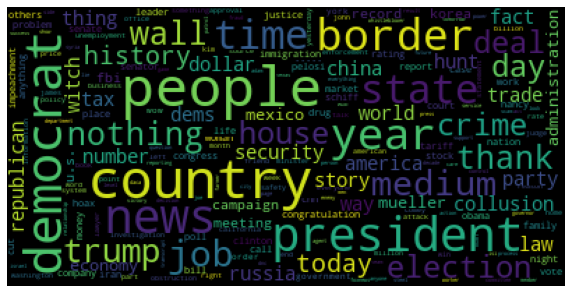

In [ ]:
# wordcloud - 좋아요 74963개 이상

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate_from_frequencies(c_17_good)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

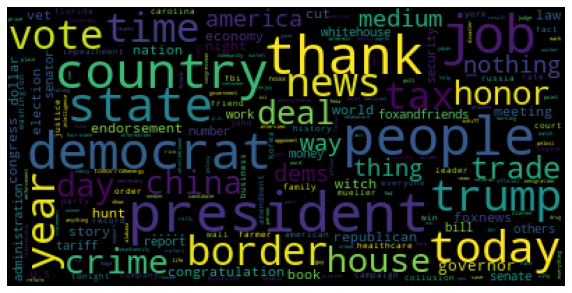

In [ ]:
# wordcloud - 좋아요 74963개 미만

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate_from_frequencies(c_17_bad)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()